In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(dataset_path):
    images = []
    masks = []

    for json_file in os.listdir(dataset_path):
        if json_file.endswith('.json'):

            json_path = os.path.join(dataset_path, json_file)
            with open(json_path) as f:
                data = json.load(f)
                image_name = data['imagePath']
                mask_data = data['shapes']


            img_path = os.path.join(dataset_path, image_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = image / 255.0
            images.append(image)


            mask = np.zeros(image.shape, dtype=np.float32)


            for shape in mask_data:
                if shape['label'] == 'miotubo':
                    points = np.array(shape['points'], dtype=np.int32)
                    cv2.fillPoly(mask, [points], 1)

            masks.append(mask)


    images = np.array(images).astype(np.float32)
    masks = np.array(masks).astype(np.float32)

    images = np.expand_dims(images, axis=-1)
    masks = np.expand_dims(masks, axis=-1)

    print(f"Imágenes cargadas: {images.shape}, Máscaras cargadas: {masks.shape}")
    return images, masks


dataset_path = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG MIOTUBOS/Herbert/Data_Augmentation'
X, y = load_data(dataset_path)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Imágenes cargadas: (501, 256, 256, 1), Máscaras cargadas: (501, 256, 256, 1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step


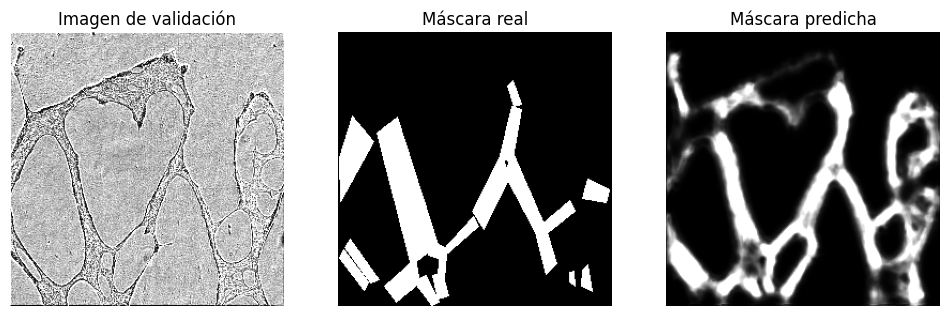

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


model = load_model('/content/SeundoModeloFinal.h5')

predictions = model.predict(X_val)


n = 3


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Imagen de validación")
plt.imshow(X_val[n].squeeze(), cmap='gray')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title("Máscara real")
plt.imshow(y_val[n].squeeze(), cmap='gray')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.title("Máscara predicha")
plt.imshow(predictions[n].squeeze(), cmap='gray')
plt.axis('off')


plt.show()


#Video


## Predicción de las imágenes


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('/content/primerModeloFinal.h5')


image_dir = '/content/drive/MyDrive/7mo Semestre /RETO-MIOTUBOS-SOLUCION/IMG-VIDEO/Plate2_derived_A2_04_03'  # Cambia a la ruta de la carpeta que contiene las imágenes
save_dir = '/content/video_final_jared'
os.makedirs(save_dir, exist_ok=True)


input_height = 256
input_width = 256


for image_name in os.listdir(image_dir):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):

        image_path = os.path.join(image_dir, image_name)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        resized_image = cv2.resize(original_image, (input_width, input_height))
        input_image = resized_image / 255.0
        input_image = np.expand_dims(input_image, axis=-1)
        input_image = np.expand_dims(input_image, axis=0)


        predicted_mask = model.predict(input_image)[0]
        predicted_mask = (predicted_mask.squeeze() * 255).astype('uint8')

        _, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)


        binary_mask_resized = cv2.resize(binary_mask, (original_image.shape[1], original_image.shape[0]))


        colored_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)


        colored_mask = np.zeros_like(colored_image)
        colored_mask[:, :, 2] = binary_mask_resized


        highlighted_image = cv2.addWeighted(colored_image, 0.7, colored_mask, 0.3, 0)


        output_path_colored = os.path.join(save_dir, f"{image_name}")
        cv2.imwrite(output_path_colored, highlighted_image)

        print(f"Imagen {image_name} procesada y guardada en {output_path_colored}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Imagen 1_2024-08-13_12-58-37.png procesada y guardada en /content/video_final_jared/1_2024-08-13_12-58-37.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Imagen 3_2024-08-13_18-45-01.png procesada y guardada en /content/video_final_jared/3_2024-08-13_18-45-01.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Imagen 2_2024-08-13_15-44-28.png procesada y guardada en /content/video_final_jared/2_2024-08-13_15-44-28.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Imagen 4_2024-08-13_21-44-32.png procesada y guardada en /content/video_final_jared/4_2024-08-13_21-44-32.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Imagen 5_2024-08-14_00-44-55.png procesada y guardada en /content/video_final_jared/5_2024-08-14_00-44-55.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Imagen 6_2024-08-14_03-44-53.png procesada y guardada en /content/video_final_jared/6_2024-08-14_03-44-53.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Imagen 7_2024-08-14_06-44-21.png procesada y guardada en /content/video_final_jared/7_20

## MP4

In [ ]:
import os
import cv2


image_dir = '/content/video_final_jared'


output_video_path = '/content/video_final_jared.mp4'


image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]


if not image_files:
    print("No se encontraron imágenes en la carpeta especificada.")
else:

    image_files.sort()


    first_image = cv2.imread(os.path.join(image_dir, image_files[0]))


    height, width, layers = first_image.shape


    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_video_path, fourcc, 1.0, (width, height))


    for image_name in image_files:
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)


        image_resized = cv2.resize(image, (width, height))


        video_writer.write(image_resized)


    video_writer.release()

    print(f"Video generado exitosamente en {output_video_path}")


Video generado exitosamente en /content/video_final_jared.mp4


## Fechas

In [ ]:
import cv2
import os


input_video_path = '/content/video_final_jared.mp4'
output_video_path = '/content/VIDEO_FINAL_2.0.mp4'


image_directory = '/content/video_final_jared'


fechas = sorted([os.path.splitext(f)[0] for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))])


if not fechas:
    print("No se encontraron imágenes en el directorio:", image_directory)
    exit()


cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Error al abrir el video de entrada.")
    exit()


fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')


out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))


frame_count = 0
num_fechas = len(fechas)
while True:
    ret, frame = cap.read()
    if not ret:
        break


    fecha_index = min(frame_count // fps, num_fechas - 1)
    fecha_texto = fechas[fecha_index]


    cv2.putText(
        frame,
        "Plate2/derived/A2/04_03",
        (10, height - 100),
        cv2.FONT_HERSHEY_SIMPLEX,
        2,
        (134, 255, 51),
        4,
        cv2.LINE_AA,
    )


    cv2.putText(
        frame,
        fecha_texto,
        (10, height - 20),
        cv2.FONT_HERSHEY_SIMPLEX,
        2,
        (134, 255, 51),
        4,
        cv2.LINE_AA,
    )


    out.write(frame)
    frame_count += 1


cap.release()
out.release()
print("Video procesado y guardado en:", output_video_path)


Video procesado y guardado en: /content/VIDEO_FINAL_2.0.mp4
